# Exploratory Data Analysis

**Learning Objective:** Learn how to generate and answer questions about data using data visualization and basic data transformations.

## 1 Imports

In [2]:
from altair import *
import numpy as np

In [3]:
cars = load_dataset('cars')
cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs        Year  
0  chevrolet chevelle malibu    USA           3504  1970-01-01  
1          buick skylark 320    USA           3693  1970-01-01  
2         plymouth satellite    USA           3436  1970-01-01  
3              amc rebel sst    USA           3433  1970-01-01  
4                ford torino    USA           3449  1970-01-01

## 2 Introduction

One of the early champions of *Exploratory Data Analysis*, or EDA, was [John W. Tukey](https://en.wikipedia.org/wiki/John_Tukey), who wrote a book by the same name in 1977. He defined data analysis as:

> Procedures for analyzing data, techniques for interpreting the results of such procedures, ways of planning the gathering of data to make its analysis easier, more precise or more accurate, and all the machinery and results of (mathematical) statistics which apply to analyzing data.

A nice modern take on EDA is provided by Garrett Grolemund and Hadley Wickham in their [R for Data Science](http://r4ds.had.co.nz) book. Grolemund and Wickham clarify that EDA is an iterative cycle that consists of:

1. Generate quetsions about your data.
2. Search for answers by visualizing, transforming and modelling your data.
3. Use what you learn to refine your questions and/or generate new questions.

In other words, EDA is all about exploring your data by generating and answering questions. This section of the course can be viewed as Python-based lecture notes for the content in R for Data Science.

## 3 Questions

Read through the [EDA section](http://r4ds.had.co.nz/exploratory-data-analysis.html) of Grolemund and Wickham.

* What is the goal of EDA?
* Describe the process of generating questions that they outline.
* What is variation and covariation and how are they related to the question generating process?

They distill the core questions of EDA down to the following two:

1. What type of variation occurs within my variables?
2. What type of covariation occurs between my variables?

Note that this section assumes a tidy dataset whose columns are variables and rows are observations/samples. 

## 4 Single variable

The first step in EDA is to explore individual variables separately. The following things are useful in exploring a single variable:

* Compute summary statistics.
* Visualize the distributions of observations.

These things enable you to understand the *variation* within a single variable. From R4DS:

> Variation is the tendency of the values of a variable to change from measurement to measurement. 

### 4.1 Quantitative variable

We begin with the cars dataset and a single quantitative variable, the `Acceleration`. First let's compute summary statistics by calling the `describe` method on that column:

In [6]:
cars['Acceleration'].describe()

count    406.000000
mean      15.519704
std        2.803359
min        8.000000
25%       13.700000
50%       15.500000
75%       17.175000
max       24.800000
Name: Acceleration, dtype: float64

Next, let's study the variation in this variable by visualizing the distributions of its observations. We begin with a tick chart:

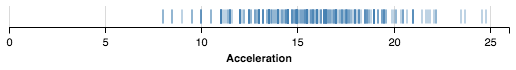

In [9]:
Chart(cars).mark_tick().encode(
    x='Acceleration'
)

We see that most values are nearby the mean of $15.5$, but that there is considerable variation about this value. Some questions we might ask:

* What are the units of the acceleration?
* Which numbers indicate large/small accelerations?
* Are there any missing or unusual values?

A tick chart is a great way of understanding the variation in a single variable. However, in dense regions of the distribution it is difficult to see exactly how many samples are present. In many cases a better visualization for a single quantitative variable is a histogram. Here is a histogram of the `Acceleration`:

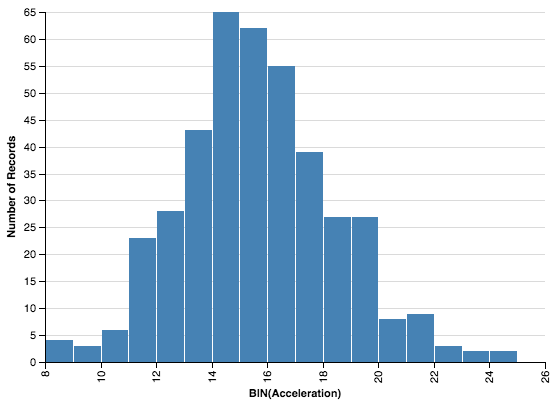

In [10]:
Chart(cars).mark_bar().encode(
    X('Acceleration:Q', bin=Bin(maxbins=30)),
    Y('count(*)')
)

The histogram is an invaluable visual tool for understanding a quantitative variable. It will immediately give you a sense of the variation and distribution of a single variable.

To show how important this type of exploration is, let's look at the IMDB and Rotten Tomatoes rating from the movies dataset. [IMDB](http://www.imdb.com/) and [Rotten Tomatoes](https://www.rottentomatoes.com/) are two websites that allow users to rate movies. You might hypothesize that users would give similar ratings at these two websites. Let's see what the data says:

In [21]:
movies = load_dataset('movies')
movies.head()

Creative_Type Director Distributor  IMDB_Rating  IMDB_Votes  \
0                  None     None    Gramercy          6.1      1071.0   
1                  None     None      Strand          6.9       207.0   
2                  None     None   Lionsgate          6.8       865.0   
3                  None     None   Fine Line          NaN         NaN   
4  Contemporary Fiction     None     Trimark          3.4       165.0   

  MPAA_Rating Major_Genre  Production_Budget Release_Date  \
0           R        None          8000000.0    12-Jun-98   
1           R       Drama           300000.0     7-Aug-98   
2        None      Comedy           250000.0    28-Aug-98   
3        None      Comedy           300000.0    11-Sep-98   
4           R       Drama          1000000.0     9-Oct-98   

   Rotten_Tomatoes_Rating  Running_Time_min               Source  \
0                     NaN               NaN                 None   
1                     NaN               NaN                 None   
2                     NaN               NaN                 None   
3                    13.0               NaN                 None   
4                    62.0               NaN  Original Screenplay   

                        Title  US_DVD_Sales   US_Gross  Worldwide_Gross  
0              The Land Girls           NaN   146083.0         146083.0  
1      First Love, Last Rites           NaN    10876.0          10876.0  
2  I Married a Strange Person           NaN   203134.0         203134.0  
3        Let's Talk About Sex           NaN   373615.0         373615.0  
4                        Slam           NaN  1009819.0        1087521.0

Here is a histogram of the IMDB ratings:

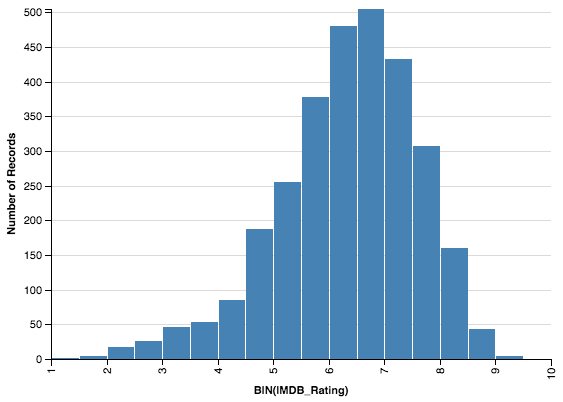

In [12]:
Chart(movies[['IMDB_Rating']]).mark_bar().encode(
    X('IMDB_Rating:Q', bin=Bin(maxbins=30)),
    Y('count(*)')
)

Note the extremely smooth distribution with a well defined peak. Now the Rotten Tomatoes ratings:

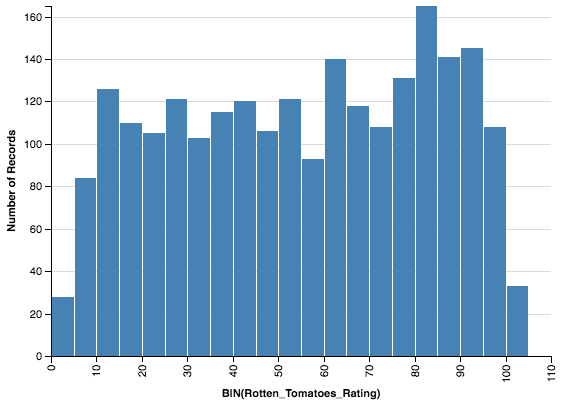

In [13]:
Chart(movies[['Rotten_Tomatoes_Rating']]).mark_bar().encode(
    X('Rotten_Tomatoes_Rating:Q', bin=Bin(maxbins=30)),
    Y('count(*)')
)

Woah! The distribution isn't smooth and doesn't have a well defined peak. These two ratings distributions show a different patterns of variation. So much so that we are prompted to begin asking questions:

* Why are these distributions so different?
* Do different types of users visit these sites?
* Why is the Rotten Tomatoes distribution not smooth, but the IMDB one is?
* Is the IMDB ratings distribution fixed by the website somehow?

Obviously, these histograms alone don't contain sufficient information to answer these questions. But maybe the rest of the data does...

### 4.2 Categorical variables

The tick chart and histogram work only for quantitative variables. For categorical (ordinal, nominal) variables, different approaches are needed. First, note that the `.describe()` method gives us different information for categorical columns:

In [5]:
cars['Origin'].describe()

count     406
unique      3
top       USA
freq      254
Name: Origin, dtype: object

Another useful method is `.unique()`, which lists the unique values of the categorical variable:

In [17]:
cars['Origin'].unique()

array(['USA', 'Europe', 'Japan'], dtype=object)

For a categorical variable, a bar chart provides similar information as the histogram does for a quantitative variable:

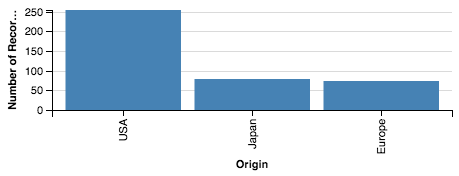

In [24]:
Chart(cars[['Origin']], width=400, height=100).mark_bar().encode(
    X('Origin:N', sort=SortField(field='Origin', op='count', order='descending')),
    Y('count(*)', axis=Axis(ticks=5))
)

This chart leads to other questions:

* Why do USA made cars dominate this dataset?
* What years does this dataset cover?
* During those years, what fraction of car models were actually made in Europe, Japan and the USA? In other words, is there sampling error or bias in this dataset?
* Does each observation represent a car model or an individual car?

### 4.3 Missing and unusual values

When exploring a single variable it is important to identify and understand missing or unusual values. Let's look at the distribution of movies ratings:

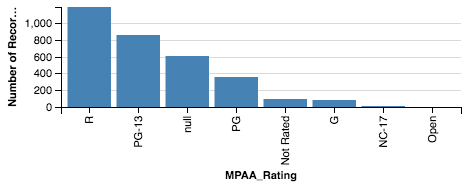

In [33]:
Chart(movies[['MPAA_Rating']], width=400, height=100).mark_bar().encode(
    X('MPAA_Rating:N', sort=SortField(field='MPAA_Rating', op='count', order='descending')),
    Y('count(*)', axis=Axis(ticks=5))
)

Notice that there is both a `Not Rated` value as well as a `null` value. This probably indicates that some movies were not rated and others didn't have a rating that got recorded in this dataset. The `null` values are an example of *missing values*. Let's look to see how these values are encoded in Python:

In [28]:
movies['MPAA_Rating'].unique()

array(['R', None, 'PG', 'Not Rated', 'PG-13', 'G', 'NC-17', 'Open'], dtype=object)

It looks like the missing values are encoded with Python's `None` value. We will look more at missing values later in the course. During the EDA process, it is important to identify missing values and understand their significance in the dataset.

It is also important to understand *unusual values*. As an example of unusual values, let's look at the `Production_Budget` variable of the movies dataset:

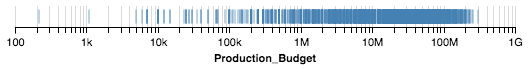

In [36]:
Chart(movies[['Production_Budget']]).mark_tick().encode(
    X('Production_Budget', scale=Scale(type='log'))
)

Viewing this variable on the log scale as ticks shows that there are a number of movies with extremely low production budgets (as low as $200!). Interestingly, this variation is more difficult to see in a histogram. Again, this brings up questions:

* Are these real movies with accurately reported productions budgets?
* Are the units of the production budgets consistent across movies? Does 200 actuall mean 200,000?
* Do these low budget movies have anything else in common?

## 5 Two variables

When exploring a single variable, you are primarily concerned with understanding the variation within that variable. With two or more variables you can explore relationships or covariation between the variables. From R4DS:

> Covariation is the tendency for the values of two or more variables to vary together in a related way. 

### 5.1 Two quantitative variables

We begin by exploring the covariation between two quantitative variables. The most common chart type to use for this type of exploration is the two-dimensional scatter chart. In Altair, this amounts to a point mark type, with the two quantitative variables encoded with the x and y position.

Again, EDA is driven by asking and answering of questions. Let's look again at the cars dataset and ask the following question:

> What other variables effect fuel efficiency (MPG) and how?

First, you might hypothesize that higher horsepower cars to have lower MPG. Let's try to answer that by visualizing these two variables:

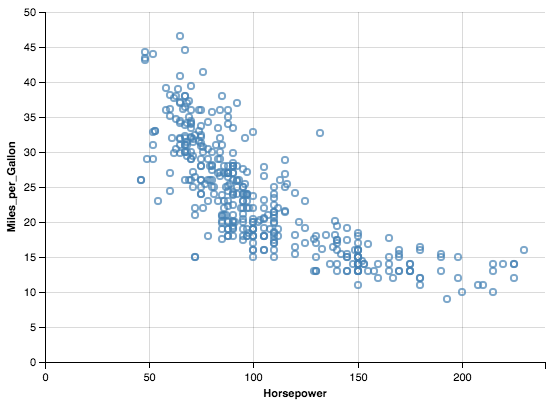

In [39]:
Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon'
)

Indeed, as expected, we observe a downwards trend in MPG as the horsepower increases. Are there other variables that could effect the MPG? Maybe lighter cars get better MPG?

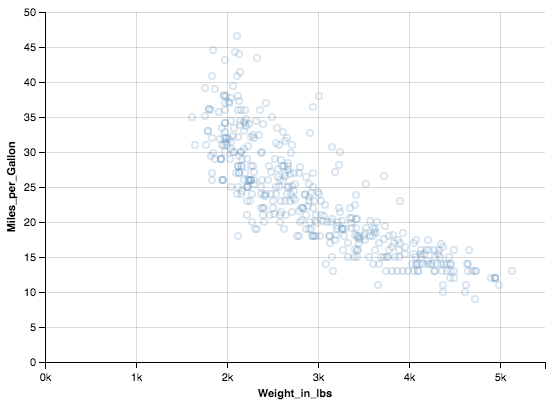

In [76]:
Chart(cars).mark_point(opacity=0.2).encode(
    x='Weight_in_lbs',
    y='Miles_per_Gallon'
)

Yes! What about displacement? The displacement of the engine is a measure of the internal volume of the combined cylinders and is expected to be directly related to the amount of fuel that is burned on each firing of the engine.

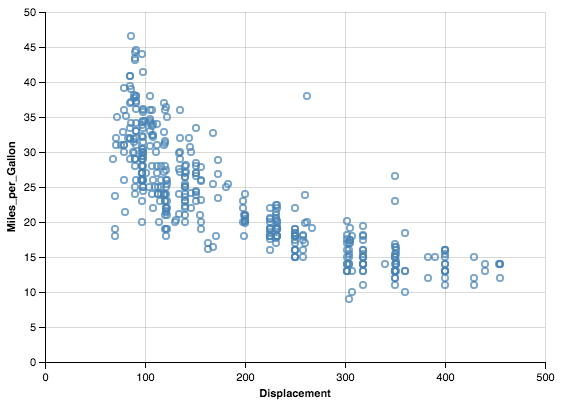

In [77]:
Chart(cars).mark_point().encode(
    x='Displacement',
    y='Miles_per_Gallon'
)

Again, we see a trend that matches our expectations. These trends also suggest other questions. What causes cars to have higher horsepower? Wouldn't larger displacement engines have more horsepower? Let's look at those two variables:

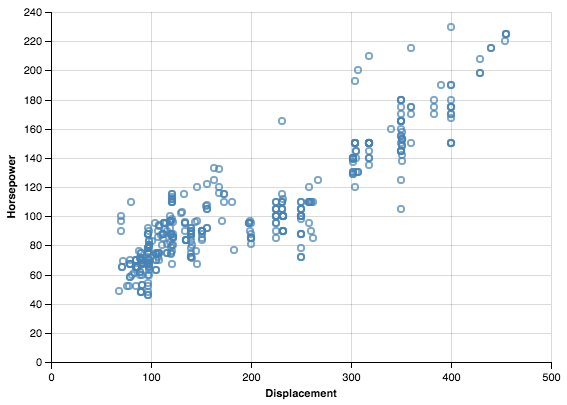

In [73]:
Chart(cars).mark_point().encode(
    y='Horsepower',
    x='Displacement',
)

All of this suggests the following picture: big cars with big engines get worse gas mileage. One interesting observation about this chart is that there are number of cars with much higher horsepower than other cars with similar displacement. What is special about those cars? Maybe those engines are turbocharged?

### 5.2 One quantitative and one categorical variable

The second case of covariation is between one quantitative and one categorical variable. Remember, for a single quantitative variable, we have seen that the tick chart and histogram give a picture of the variable's distribution. To see how a quantitative variable covaries with a categorical, one option is to use a tick chart and encode the categorical using row, y or color. Let's see how the horsepower varies with the number of cylinders:

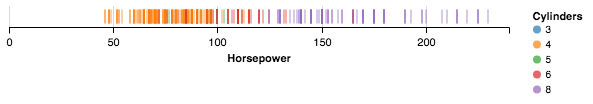

In [83]:
Chart(cars).mark_tick().encode(
    X('Horsepower'),
    Color('Cylinders:N')
)

Here we see that 8 larger cylinder engines generate more horsepower (as expected). However, a single tick chart with cylinders encoded using color makes it difficult to see the individual distributions. Let's encode cylinders using row intead:

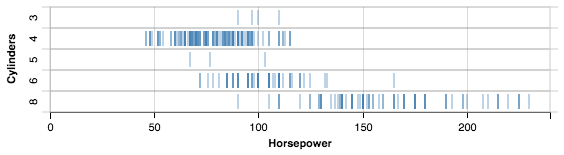

In [81]:
Chart(cars).mark_tick().encode(
    X('Horsepower'),
    Row('Cylinders:O')
)

Much better! Now we can see the clear differences in the horsepower distributions grouped by cylinders. As expected, there is an overall trend for more cylinders to generate more horsepower, but there is a surprising amount of a variation.

An alternative to grouped tick chart is a grouped histogram. Here we encode the origin using with the row to create a facet of histograms:

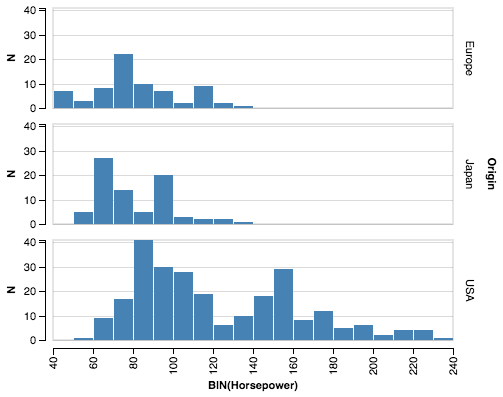

In [93]:
Chart(cars).mark_bar().encode(
    X('Horsepower', bin=Bin(maxbins=30)),
    Y('count(*)', axis=Axis(ticks=5), title='N'),
    Row('Origin:N')
).configure_cell(width=400, height=100)

### 5.3 Two categorical variables

The third case of covariation is between two categorical variables. In this case, it is common to encode the count using size or color. Here is an example that looks at the covariation between a movies MPAA rating and its genre:

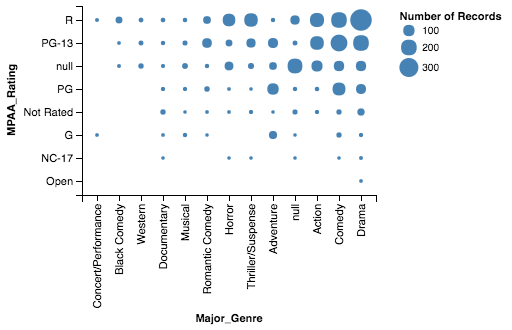

In [113]:
Chart(movies).mark_circle().encode(
    X('Major_Genre', sort=SortField(field='Major_Genre', op='count')),
    Y('MPAA_Rating', sort=SortField(field='MPAA_Rating', op='count', order='descending')),
    Size('count(*)')
)

Another option is to use a heatmap to encode the counts (or other aggegation) of two categorical variables. In Altair a heatmap can be generated using the text mark (with no text and the `applyColorToBackground` option) and the row and column. Here is the above example as a heatmap:

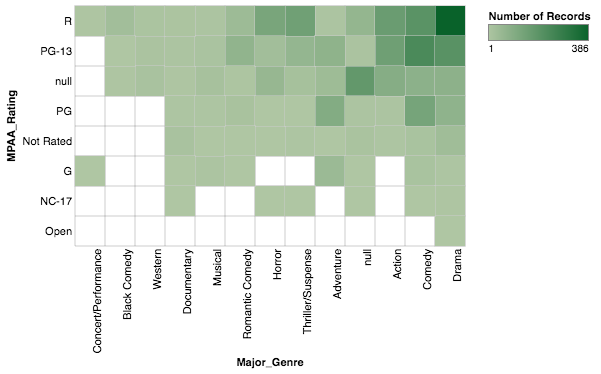

In [110]:
Chart(movies).mark_text(
    applyColorToBackground=True,
).encode(
    Column('Major_Genre',
           sort=SortField(field='Major_Genre', op='count'),
           axis=Axis(labelAngle=-90, labelAlign='right', orient='bottom')
    ),
    Row('MPAA_Rating', sort=SortField(field='MPAA_Rating', op='count', order='descending')),
    text=Text(value=' '),
    color='count(*)'
).configure_scale(
   textBandWidth=30,
   bandSize=30
)